# 01 - Desafio Nuveo

Obs: O modelo de autoencoder foi criado no diretório DevTools

## Este kernel abordará o conceito de autoencoder voltado para a limpeza de documentos

## Os documentos estão manchados ou pouco legiveis para o extrair suas informações

## O autoencoder primeiramente limpará a imagem

## A biblioteca Tesseract-OCR da Google será responsável por extrair as informações do documento
### Essa biblioteca é open source e utiliza um modelo de CNN+LSTM para extrair as palavras das imagens

In [1]:
# Importando bibliotecas
from tensorflow.keras.models import load_model
from utils import *

In [2]:
# Listagem de todas as imagens no dataset
TEST_IMAGES = glob('noisy_data/*.png')

In [3]:
# Carregando as imagens a serem analisadas
img_shape = (336, 432, 1)
x_test, image_names = load_image(TEST_IMAGES, img_shape)

In [4]:
# Carregando o Autoencoder
model = load_model('../DevTools/weights/saved_model.h5')

In [5]:
# Realizando as predições
preds = model.predict(x_test)

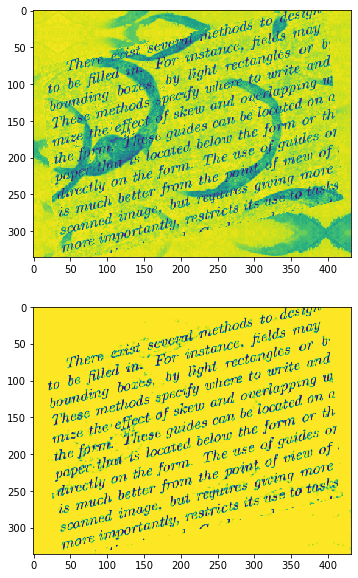

In [6]:
# Plotando o resultado ANTES | DEPOIS
PlotResult(x_test, preds, 1)

In [7]:
# Esta função é responsável por gerar salvar os documentos limpos
# Extrair as informações das imagens e salvar no arquivo "results.csv" 
phrases = Results(preds)

In [ ]:
# Salvando os resultados no arquivo results.csv

result = {
    "phrases": phrases,
    "filename": image_names,
}

results = pd.DataFrame(result)
results = pd.to_csv('results.csv')